In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"] = (12,5)

In [3]:
datacovid = pd.read_excel('datasetcovidjktid.xlsx',sheet_name='dataset')

datacovid.sample(5)

,Tanggal,Variant_Suspect,Day,ID_CUM_POSITIVE,ID_CUM_HOSPITALIZED,ID_CUM_CURED,ID_CUM_DEATH,JKT_CUM_POSITIVE,JKT_CUM_HOSPITALIZED,JKT_CUM_CURED,...,JKT_DAILY_ACTIVEPOSITIVE,JKT_DAILY_TESTED,JKT_DAILY_POSTEST,JKT_DAILY_NEGTEST,JKT_DAILY_POSTRATE,PoF,JKT_CONS_VALUE,CoF,Risk,Risk_Criteria
612,2021-11-03,Delta,185,4246174,11592,4091101,143481,861832,258,847353,...,-21,19214.0,119.0,19095.0,0.006193,1.0,119.0,1.0,1.0,LOW
408,2021-04-13,Alpha-Beta-Gamma,409,1577526,108599,1426145,42782,394118,2861,381449,...,-84,10673.0,1330.0,9343.0,0.124614,2.0,725.0,2.0,4.0,MEDIUM
199,2020-09-16,Alpha-Beta-Gamma,200,228993,55792,164101,9100,58458,4802,44251,...,530,13012.0,1403.0,11609.0,0.107824,2.0,2263.0,3.0,6.0,HIGH
629,2021-11-20,Delta,202,4253098,8154,4101216,143728,863345,209,849265,...,-41,10428.0,26.0,10402.0,0.002493,1.0,137.0,2.0,2.0,LOW
101,2020-06-10,Alpha-Beta-Gamma,102,34316,20228,12129,1959,8423,1427,3517,...,-5,2827.0,76.0,2751.0,0.026884,1.0,129.0,1.0,1.0,LOW


In [5]:
datacovid.describe(include="all", datetime_is_numeric=True)

,Tanggal,Variant_Suspect,Day,ID_CUM_POSITIVE,ID_CUM_HOSPITALIZED,ID_CUM_CURED,ID_CUM_DEATH,JKT_CUM_POSITIVE,JKT_CUM_HOSPITALIZED,JKT_CUM_CURED,...,JKT_DAILY_ACTIVEPOSITIVE,JKT_DAILY_TESTED,JKT_DAILY_POSTEST,JKT_DAILY_NEGTEST,JKT_DAILY_POSTRATE,PoF,JKT_CONS_VALUE,CoF,Risk,Risk_Criteria
count,764,764,764.000000,7.640000e+02,764.000000,7.640000e+02,764.000000,7.640000e+02,764.000000,7.640000e+02,...,764.000000,762.000000,762.000000,762.000000,762.000000,724.000000,724.000000,724.000000,724.000000,724
unique,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,Alpha-Beta-Gamma,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MEDIUM
freq,NaN,428,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,318
mean,2021-03-17 12:00:00.000000256,NaN,159.421466,1.988810e+06,111822.445026,1.816104e+06,60883.447644,4.348129e+05,3787.302356,4.144274e+05,...,7.201571,13669.069554,1626.812336,12042.257218,0.100680,1.990331,1682.886740,2.000000,4.241713,NaN
min,2020-03-01 00:00:00,NaN,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,...,-12107.000000,3.000000,0.000000,3.000000,0.000000,1.000000,-1375.000000,1.000000,1.000000,NaN
25%,2020-09-07 18:00:00,NaN,64.000000,1.992735e+05,18084.500000,1.423815e+05,8205.000000,4.855725e+04,1076.000000,3.619600e+04,...,-156.000000,7440.750000,147.250000,6541.500000,0.040962,2.000000,129.750000,1.750000,2.000000,NaN
50%,2021-03-17 12:00:00,NaN,128.000000,1.440568e+06,63372.500000,1.269816e+06,39028.500000,3.645595e+05,2560.000000,3.522535e+05,...,19.000000,12394.500000,782.000000,11253.000000,0.085421,2.000000,657.500000,2.000000,4.000000,NaN
75%,2021-09-24 06:00:00,NaN,237.250000,4.204650e+06,135934.500000,4.017992e+06,141288.750000,8.569642e+05,4354.250000,8.414428e+05,...,186.250000,17372.500000,1582.500000,15474.750000,0.129592,2.000000,1561.250000,2.250000,6.000000,NaN
max,2022-04-03 00:00:00,NaN,428.000000,6.019981e+06,586113.000000,5.768703e+06,155288.000000,1.239622e+06,30418.000000,1.218930e+06,...,10126.000000,60664.000000,15825.000000,49957.000000,0.567073,3.000000,18760.000000,3.000000,9.000000,NaN


<AxesSubplot:xlabel='Variant_Suspect', ylabel='JKT_DAILY_DEATH'>

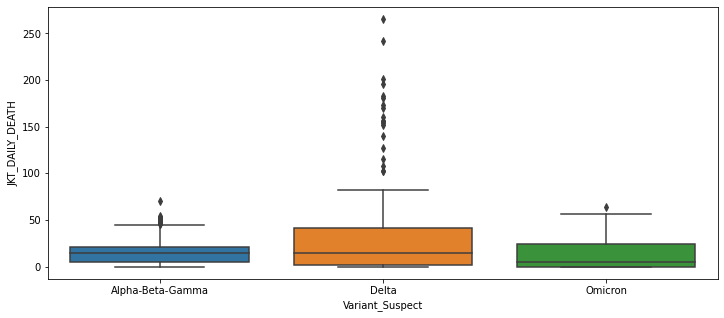

In [6]:
sns.boxplot(x="Variant_Suspect", y="JKT_DAILY_DEATH", data=datacovid)

In [ ]:
sns.countplot(x="Variant_Suspect", hue="Risk_Criteria", data=datacovid)

In [ ]:
covid_JKT = datacovid.loc[:,['Variant_Suspect','Day','JKT_DAILY_POSITIVE','JKT_DAILY_DEATH','JKT_DAILY_HOSPITALIZED','JKT_DAILY_POSTRATE','JKT_DAILY_TESTED','Risk','Risk_Criteria']]

sns.pairplot(covid_JKT,hue='Variant_Suspect').fig.suptitle("Pair Plot Covid Jakarta", y=1.01)

In [ ]:
covid_ABG = datacovid.loc[datacovid.Variant_Suspect=='Alpha-Beta-Gamma',['Day','JKT_DAILY_POSITIVE','JKT_DAILY_DEATH','JKT_DAILY_HOSPITALIZED','JKT_DAILY_POSTRATE','JKT_DAILY_TESTED','Risk','Risk_Criteria']]
covid_Delta = datacovid.loc[datacovid.Variant_Suspect=='Delta',['Day','JKT_DAILY_POSITIVE','JKT_DAILY_DEATH','JKT_DAILY_HOSPITALIZED','JKT_DAILY_POSTRATE','JKT_DAILY_TESTED','Risk','Risk_Criteria']]
covid_Omicron = datacovid.loc[datacovid.Variant_Suspect=='Omicron',['Day','JKT_DAILY_POSITIVE','JKT_DAILY_DEATH','JKT_DAILY_HOSPITALIZED','JKT_DAILY_POSTRATE','JKT_DAILY_TESTED','Risk','Risk_Criteria']]

In [ ]:
y1 = covid_ABG.JKT_DAILY_POSITIVE
y2 = covid_Delta.JKT_DAILY_POSITIVE
y3 = covid_Omicron.JKT_DAILY_POSITIVE

x1 = covid_ABG.Day
x2 = covid_Delta.Day
x3 = covid_Omicron.Day

plt.rcParams["figure.figsize"] = (15,8)
plt.plot(x1,y1,'--r',label="Daily Alpha-Beta-Gamma")
plt.plot(x2,y2,'-.b',label="Daily Delta")
plt.plot(x3,y3,'g', label="Daily Omicron")
plt.xlabel('Day#')
plt.ylabel('People Positive Covid')
plt.legend()
plt.show()

In [ ]:
sns.pairplot(covid_ABG).fig.suptitle("Pair Plot Covid Variant Alpha - Beta - Gamma", y=1.01)
sns.pairplot(covid_Delta).fig.suptitle("Pair Plot Covid Variant Delta", y=1.01)
sns.pairplot(covid_Omicron).fig.suptitle("Pair Plot Covid Variant Omicron", y=1.01)

In [ ]:
corrdata_ABG = covid_ABG.corr()

corrdata_ABG

In [ ]:
sns.heatmap(corrdata_ABG, annot=True)

In [ ]:
corrdata_Delta = covid_Delta.corr()

corrdata_Delta

In [ ]:
sns.heatmap(corrdata_Delta, annot=True)

In [ ]:
corrdata_Omicron = covid_Omicron.corr()

corrdata_Omicron

In [ ]:
sns.heatmap(corrdata_Delta, annot=True)

In [ ]:
datacovid.columns

In [11]:
import plotly.express as px

fig = px.line(datacovid, x="Tanggal", y="JKT_DAILY_POSITIVE")

fig.show()